In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import datetime
import pandas as pd
from iris.time import PartialDateTime
from iris.util import mask_cube_from_shapefile
import cartopy.io.shapereader as shpreader
from shapely.ops import unary_union
from shapely.geometry.polygon import Polygon
from shapely import MultiPolygon, Polygon


In [2]:
filenames = [#'C:/Users/Tilt/Downloads/Project/Data/data_2010.nc','C:/Users/Tilt/Downloads/Project/Data/data_2011.nc',
             #'C:/Users/Tilt/Downloads/Project/Data/data_2012.nc','C:/Users/Tilt/Downloads/Project/Data/data_2013.nc',
             #'C:/Users/Tilt/Downloads/Project/Data/data_2014.nc',
             'C:/Users/Tilt/Downloads/Project/Data/data_2015.nc',
             'C:/Users/Tilt/Downloads/Project/Data/data_2016.nc','C:/Users/Tilt/Downloads/Project/Data/data_2017.nc',
             'C:/Users/Tilt/Downloads/Project/Data/data_2018.nc','C:/Users/Tilt/Downloads/Project/Data/data_2019.nc']
cubes = iris.load(filenames)
cubes = cubes.concatenate()
print(cubes)

0: population_density / (unknown)      (time: 60; latitude: 720; longitude: 1440)
1: observed_fraction_mask / (unknown)  (latitude: 720; longitude: 1440)
2: observed_fraction_mask / (unknown)  (latitude: 720; longitude: 1440)
3: observed_fraction_mask / (unknown)  (latitude: 720; longitude: 1440)
4: observed_fraction_mask / (unknown)  (latitude: 720; longitude: 1440)
5: observed_fraction_mask / (unknown)  (latitude: 720; longitude: 1440)
6: 10 metre wind speed / (m s**-1)     (time: 60; latitude: 720; longitude: 1440)
7: 2 metre temperature / (K)           (time: 60; latitude: 720; longitude: 1440)
8: Convective available potential energy / (J kg**-1) (time: 60; latitude: 720; longitude: 1440)
9: Leaf area index, high vegetation / (m**2 m**-2) (time: 60; latitude: 720; longitude: 1440)
10: Leaf area index, low vegetation / (m**2 m**-2) (time: 60; latitude: 720; longitude: 1440)
11: Total precipitation / (m)           (time: 60; latitude: 720; longitude: 1440)
12: Volumetric soil water 

In [3]:
windCube1Slice = cubes.extract(iris.Constraint('standard error of the estimation of burned area'))
print(windCube1Slice)

0: standard error of the estimation of burned area / (m2) (time: 60; latitude: 720; longitude: 1440)


burned_area / (m2)                  (time: 60; latitude: 720; longitude: 1440)
    Dimension coordinates:
        time                             x             -               -
        latitude                         -             x               -
        longitude                        -             -               x
    Cell methods:
        0                           time: sum
    Attributes:
        Conventions                 'CF-1.7'
        cdm_data_type               'Grid'
        comment                     'These data were produced as part of the ESA Fire_cci programme.'
        creator_email               'emilio.chuvieco@uah.es'
        creator_name                'University of Alcala'
        creator_url                 'www.esa-fire-cci.org'
        doi                         '10.5285/3628cb2fdba443588155e15dee8e5352'
        geospatial_lat_max          '90'
        geospatial_lat_min          '-90'
        geospatial_lat_resolution   '0.25'
        geospatial_la

c:\Users\Tilt\miniconda3\Lib\site-packages\dask\core.py:127: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\Tilt\miniconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'label'
  result = super().contourf(*args, **kwargs)


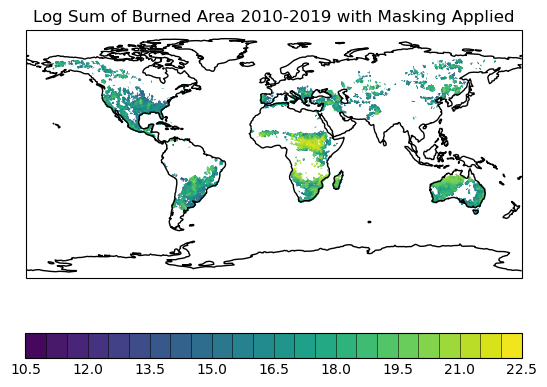

unknown / (unknown)                 (latitude: 720; longitude: 1440)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Attributes:
        Conventions                 'CF-1.7'
        cdm_data_type               'Grid'
        comment                     'These data were produced as part of the ESA Fire_cci programme.'
        creator_email               'emilio.chuvieco@uah.es'
        creator_name                'University of Alcala'
        creator_url                 'www.esa-fire-cci.org'
        doi                         '10.5285/3628cb2fdba443588155e15dee8e5352'
        geospatial_lat_max          '90'
        geospatial_lat_min          '-90'
        geospatial_lat_resolution   '0.25'
        geospatial_lat_units        'degrees_north'
        geospatial_lon_max          '180'
        geospatial_lon_min          '-180'
        geospatial_lon_resolution   '0.25'
        

In [4]:
BurnedCube = cubes.extract(iris.Constraint('burned_area'))[0]
print(BurnedCube)
ObsMaskCube = cubes.extract(iris.Constraint('observed_fraction_mask'))[0]
print(ObsMaskCube)
BurnedCubeSum=0
#print(BurnedCube)
for j in range(5):
    for i in range(12):
        dt1 = datetime.datetime(2015+j, i+1, 1)   
        BurnedCubeSlice = BurnedCube.extract(iris.Constraint(time=dt1))
        BurnedCubeSum = iris.analysis.maths.add(BurnedCubeSlice, BurnedCubeSum)
print(BurnedCubeSum)
BurnedCubeSum = iris.analysis.maths.multiply(BurnedCubeSum, ObsMaskCube)
BurnedCubeSum = iris.analysis.maths.log(BurnedCubeSum)
print(BurnedCubeSum)

qplt.contourf(BurnedCubeSum, 25, label="Log Burned Area (m^2)")
plt.gca().coastlines()
plt.title("Log Sum of Burned Area 2010-2019 with Masking Applied")
plt.show()
print(BurnedCubeSum)

[<POLYGON ((-53.374 -33.768, -53.651 -33.202, -53.21 -32.728, -53.788 -32.047...>, <POLYGON ((49.544 -12.47, 49.809 -12.895, 50.057 -13.556, 50.217 -14.759, 50...>, <POLYGON ((-7.454 37.098, -7.537 37.429, -7.167 37.804, -7.029 38.076, -7.37...>]
MULTIPOLYGON (((49.808980747279094 -12.895284925999555, 50.056510857957164 -13.555761407121985, 50.21743126811407 -14.758788750876796, 50.47653689962553 -15.226512139550543, 50.377111443895956 -15.706069431219127, 50.20027469259318 -16.000263360256767, 49.86060550313868 -15.414252618066918, 49.67260664246086 -15.710203545802479, 49.863344354050156 -16.451036879138776, 49.77456424337271 -16.8750420060936, 49.49861209493412 -17.106035658438273, 49.435618523970305 -17.953064060134366, 49.041792433473944 -19.118781019774445, 48.54854088724801 -20.496888116134127, 47.93074913919867 -22.391501153251085, 47.54772342305131 -23.781958916928517, 47.095761346226595 -24.941629733990453, 46.282477654817086 -25.178462823184105, 45.40950768411045 -25.6014344

c:\Users\Tilt\miniconda3\Lib\site-packages\iris\_shapefiles.py:147: IrisDefaultingWarning: Cube has no coord_system; using default GeogCS lat/lon
  warnings.warn(


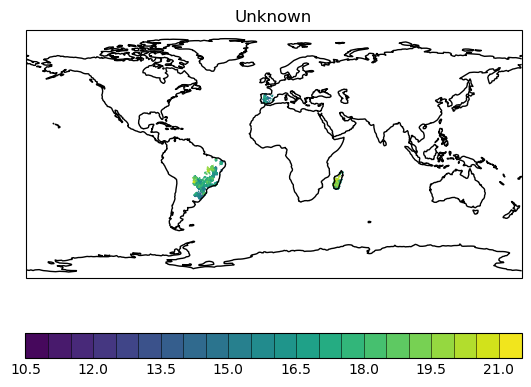

In [5]:
#Adjust Country Names -> Currently only works for 3 countries => See bdy:
country_names=["Brazil","Spain","Madagascar"]

country_shp_reader = shpreader.Reader(
    shpreader.natural_earth(
        resolution="110m", category="cultural", name="admin_0_countries"
    )
).records()

geoms = []
for country in country_shp_reader:
    if country.attributes['NAME_LONG'] in country_names:
        try:
            geoms += country.geometry
        except TypeError:
            geoms.append(country.geometry)
print(geoms)

bdy = [geoms[0],geoms[1],geoms[2]] # Fix!!!!
bdy = unary_union(bdy)
print(bdy)

BurnedCubeAoI = mask_cube_from_shapefile(BurnedCubeSum, bdy)

qplt.contourf(BurnedCubeAoI, 25)
plt.gca().coastlines()
plt.show()

Country Specific

In [6]:
BurnedCube = cubes.extract(iris.Constraint('burned_area'))[0]
# Adjust CountryName as necc
CountryName = "Brazil"
country_shp_reader = shpreader.Reader(
    shpreader.natural_earth(
        resolution="110m", category="cultural", name="admin_0_countries"
    )
)
country_shp = [
    country.geometry
    for country in country_shp_reader.records()
    if CountryName in country.attributes["NAME_LONG"]
][0]
BrazilCube = mask_cube_from_shapefile(BurnedCube, country_shp)

CountryName = "Madagascar"
Mdg_shp = [
    country.geometry
    for country in country_shp_reader.records()
    if CountryName in country.attributes["NAME_LONG"]
][0]
MadagascarCube = mask_cube_from_shapefile(BurnedCube, Mdg_shp)

CountryName = "United States"
country_shp = [
    country.geometry
    for country in country_shp_reader.records()
    if CountryName in country.attributes["NAME_LONG"]
][0]
USCube = mask_cube_from_shapefile(BurnedCube, country_shp)

CountryName = "Portugal"
Prt_shp = [
    country.geometry
    for country in country_shp_reader.records()
    if CountryName in country.attributes["NAME_LONG"]
][0]
PortugalCube = mask_cube_from_shapefile(BurnedCube, Prt_shp)

CountryName = "Australia"
country_shp = [
    country.geometry
    for country in country_shp_reader.records()
    if CountryName in country.attributes["NAME_LONG"]
][0]
AusCube = mask_cube_from_shapefile(BurnedCube, country_shp)


c:\Users\Tilt\miniconda3\Lib\site-packages\iris\_shapefiles.py:147: IrisDefaultingWarning: Cube has no coord_system; using default GeogCS lat/lon
  warnings.warn(
c:\Users\Tilt\miniconda3\Lib\site-packages\iris\_shapefiles.py:147: IrisDefaultingWarning: Cube has no coord_system; using default GeogCS lat/lon
  warnings.warn(
c:\Users\Tilt\miniconda3\Lib\site-packages\iris\_shapefiles.py:147: IrisDefaultingWarning: Cube has no coord_system; using default GeogCS lat/lon
  warnings.warn(
c:\Users\Tilt\miniconda3\Lib\site-packages\iris\_shapefiles.py:147: IrisDefaultingWarning: Cube has no coord_system; using default GeogCS lat/lon
  warnings.warn(
c:\Users\Tilt\miniconda3\Lib\site-packages\iris\_shapefiles.py:147: IrisDefaultingWarning: Cube has no coord_system; using default GeogCS lat/lon
  warnings.warn(


In [7]:
BrazilCubeMean = BrazilCube.collapsed('longitude', iris.analysis.MEAN)
BrazilCubeMean = BrazilCubeMean.collapsed('latitude', iris.analysis.MEAN)

MadagascarCubeMean = MadagascarCube.collapsed('longitude', iris.analysis.MEAN)
MadagascarCubeMean = MadagascarCubeMean.collapsed('latitude', iris.analysis.MEAN)

USCubeMean = USCube.collapsed('longitude', iris.analysis.MEAN)
USCubeMean = USCubeMean.collapsed('latitude', iris.analysis.MEAN)

PortugalCubeMean = PortugalCube.collapsed('longitude', iris.analysis.MEAN)
PortugalCubeMean = PortugalCubeMean.collapsed('latitude', iris.analysis.MEAN)

AusCubeMean = AusCube.collapsed('longitude', iris.analysis.MEAN)
AusCubeMean = AusCubeMean.collapsed('latitude', iris.analysis.MEAN)

c:\Users\Tilt\miniconda3\Lib\site-packages\iris\cube.py:4067: IrisUserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(
c:\Users\Tilt\miniconda3\Lib\site-packages\iris\cube.py:4067: IrisUserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(
c:\Users\Tilt\miniconda3\Lib\site-packages\iris\cube.py:4067: IrisUserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(
c:\Users\Tilt\miniconda3\Lib\site-packages\iris\cube.py:4067: IrisUserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(
c:\Users\Tilt\miniconda3\Lib\site-packages\iris\cube.py:4067: IrisUserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(


burned_area / (m2)                  (time: 60)
    Dimension coordinates:
        time                             x
    Scalar coordinates:
        latitude                    0.0 degrees, bound=(-90.0, 90.0) degrees
        longitude                   0.0 degrees, bound=(-180.0, 180.0) degrees
    Cell methods:
        0                           time: sum
        1                           longitude: mean
        2                           latitude: mean
    Attributes:
        Conventions                 'CF-1.7'
        cdm_data_type               'Grid'
        comment                     'These data were produced as part of the ESA Fire_cci programme.'
        creator_email               'emilio.chuvieco@uah.es'
        creator_name                'University of Alcala'
        creator_url                 'www.esa-fire-cci.org'
        doi                         '10.5285/3628cb2fdba443588155e15dee8e5352'
        geospatial_lat_max          '90'
        geospatial_lat_min     

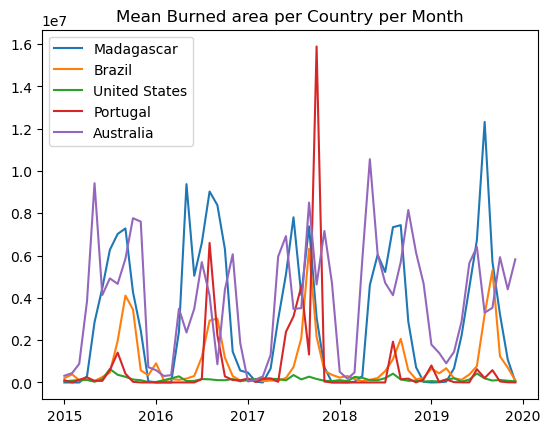

In [8]:
print(MadagascarCubeMean)
iplt.plot(MadagascarCubeMean, label = "Madagascar")
iplt.plot(BrazilCubeMean, label = "Brazil")
iplt.plot(USCubeMean, label = "United States")
iplt.plot(PortugalCubeMean, label = "Portugal")
iplt.plot(AusCubeMean, label = "Australia")
plt.title("Mean Burned area per Country per Month")
plt.legend()

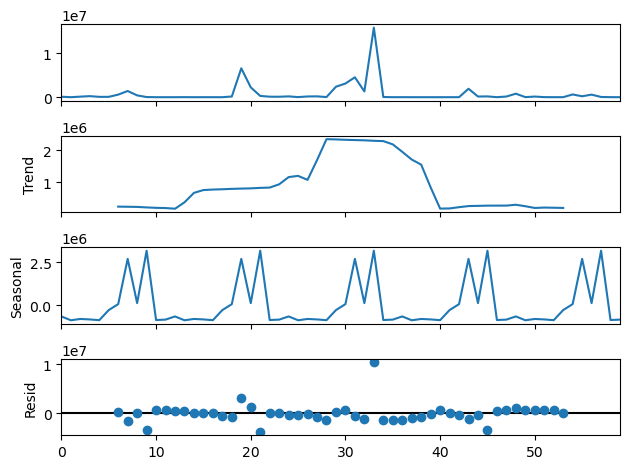

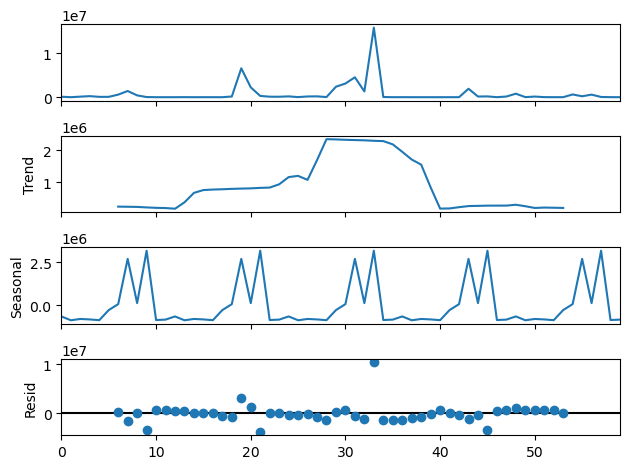

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(pd.Series(PortugalCubeMean.data),period=12)
results.plot()

In [10]:
BrazilCube2 = BrazilCube
BrazilCube2.data = BrazilCube2.data/BrazilCube2.data
BrazilCubeNum = BrazilCube2.collapsed('longitude', iris.analysis.SUM)
BrazilCubeNum = BrazilCubeNum.collapsed('latitude', iris.analysis.SUM)

MadagascarCube2 = MadagascarCube
MadagascarCube2.data = MadagascarCube2.data/MadagascarCube2.data
MadagascarCubeNum = MadagascarCube2.collapsed('longitude', iris.analysis.SUM)
MadagascarCubeNum = MadagascarCubeNum.collapsed('latitude', iris.analysis.SUM)

USCube2 = USCube
USCube2.data = USCube2.data/USCube2.data
USCubeNum = USCube2.collapsed('longitude', iris.analysis.SUM)
USCubeNum = USCubeNum.collapsed('latitude', iris.analysis.SUM)

PortugalCube2 = PortugalCube
PortugalCube2.data = PortugalCube2.data/PortugalCube2.data
PortugalCubeNum = PortugalCube2.collapsed('longitude', iris.analysis.SUM)
PortugalCubeNum = PortugalCubeNum.collapsed('latitude', iris.analysis.SUM)

AusCube2 = AusCube
AusCube2.data = AusCube2.data/AusCube2.data
AusCubeNum = AusCube2.collapsed('longitude', iris.analysis.SUM)
AusCubeNum = AusCubeNum.collapsed('latitude', iris.analysis.SUM)

c:\Users\Tilt\miniconda3\Lib\site-packages\iris\cube.py:4067: IrisUserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(


burned_area / (m2)                  (time: 60)
    Dimension coordinates:
        time                             x
    Scalar coordinates:
        latitude                    0.0 degrees, bound=(-90.0, 90.0) degrees
        longitude                   0.0 degrees, bound=(-180.0, 180.0) degrees
    Cell methods:
        0                           time: sum
        1                           longitude: sum
        2                           latitude: sum
    Attributes:
        Conventions                 'CF-1.7'
        cdm_data_type               'Grid'
        comment                     'These data were produced as part of the ESA Fire_cci programme.'
        creator_email               'emilio.chuvieco@uah.es'
        creator_name                'University of Alcala'
        creator_url                 'www.esa-fire-cci.org'
        doi                         '10.5285/3628cb2fdba443588155e15dee8e5352'
        geospatial_lat_max          '90'
        geospatial_lat_min       

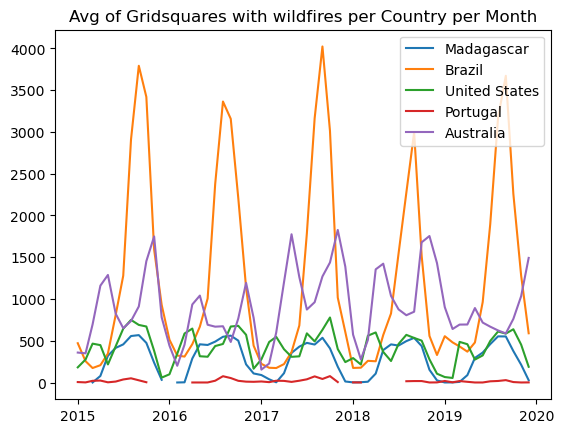

In [11]:
print(MadagascarCubeNum)
iplt.plot(MadagascarCubeNum, label = "Madagascar")
iplt.plot(BrazilCubeNum, label = "Brazil")
iplt.plot(USCubeNum, label = "United States")
iplt.plot(PortugalCubeNum, label = "Portugal")
iplt.plot(AusCubeNum, label = "Australia")
plt.title("Avg of Gridsquares with wildfires per Country per Month")
plt.legend()

In [12]:
ObsMaskCube = cubes.extract(iris.Constraint('observed_fraction_mask'))[0]
ObsMaskCube = mask_cube_from_shapefile(ObsMaskCube, Prt_shp)

c:\Users\Tilt\miniconda3\Lib\site-packages\iris\_shapefiles.py:147: IrisDefaultingWarning: Cube has no coord_system; using default GeogCS lat/lon
  warnings.warn(


c:\Users\Tilt\miniconda3\Lib\site-packages\iris\cube.py:4067: IrisUserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(


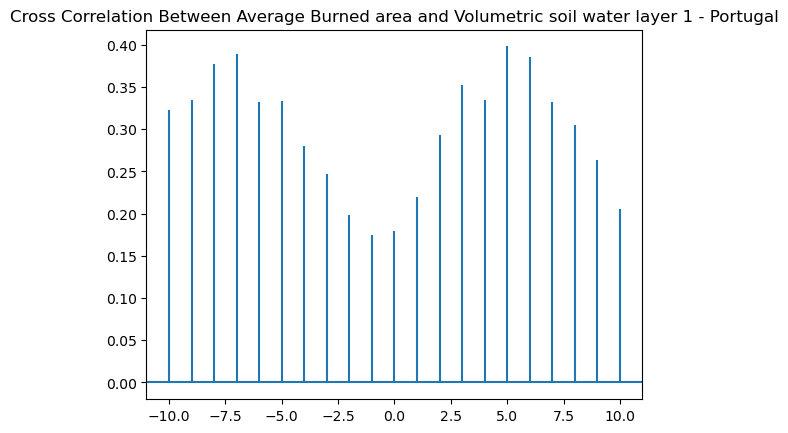

In [13]:
# MadagascarCubeNum -> # Gridboxes with Wildfires
# MadagascarCubeMean -> # Mean Burned Area

Cube2 = cubes.extract(iris.Constraint('Volumetric soil water layer 1'))[0]
Cube2 = iris.analysis.maths.multiply(Cube2, ObsMaskCube)
Cube2 = Cube2.collapsed('longitude', iris.analysis.MEAN)
Cube2 = Cube2.collapsed('latitude', iris.analysis.MEAN)
plt.xcorr(Cube2.data,PortugalCubeMean.data)
plt.title("Cross Correlation Between Average Burned area and Volumetric soil water layer 1 - Portugal")
plt.show()

population_density
10 metre wind speed
2 metre temperature
Convective available potential energy
Leaf area index, high vegetation
Leaf area index, low vegetation
Total precipitation
Volumetric soil water layer 1
burned_area

In [14]:
BurnedCube = cubes.extract(iris.Constraint('burned_area'))[0]
country_shp_reader = shpreader.Reader(
    shpreader.natural_earth(
        resolution="110m", category="cultural", name="admin_0_countries"
    )
)
Prt_shp = [
    country.geometry
    for country in country_shp_reader.records()
    if "Portugal" in country.attributes["NAME_LONG"]
][0]
PortugalCube = mask_cube_from_shapefile(BurnedCube, Prt_shp)
Mdg_shp = [
    country.geometry
    for country in country_shp_reader.records()
    if "Madagascar" in country.attributes["NAME_LONG"]
][0]
MadagascarCube = mask_cube_from_shapefile(BurnedCube, Mdg_shp)

c:\Users\Tilt\miniconda3\Lib\site-packages\iris\_shapefiles.py:147: IrisDefaultingWarning: Cube has no coord_system; using default GeogCS lat/lon
  warnings.warn(
c:\Users\Tilt\miniconda3\Lib\site-packages\iris\_shapefiles.py:147: IrisDefaultingWarning: Cube has no coord_system; using default GeogCS lat/lon
  warnings.warn(


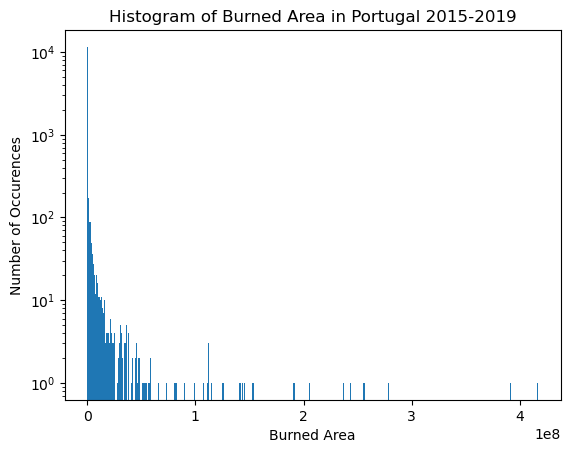

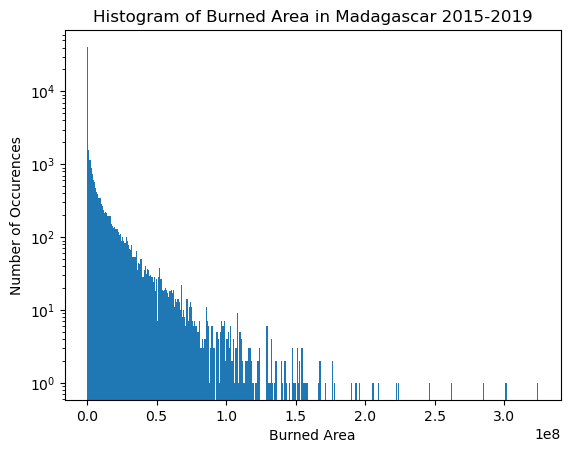

In [15]:
PortugalData = PortugalCube.data
plt.hist(PortugalData.compressed(), bins=400,log=True)
plt.title("Histogram of Burned Area in Portugal 2015-2019")
plt.xlabel("Burned Area")
plt.ylabel("Number of Occurences")
plt.show()

MadagascarData = MadagascarCube.data
plt.hist(MadagascarData.compressed(), bins=400,log=True)
plt.title("Histogram of Burned Area in Madagascar 2015-2019")
plt.xlabel("Burned Area")
plt.ylabel("Number of Occurences")
plt.show()

In [16]:
TotalWildfiresPort = PortugalCubeNum.collapsed('time', iris.analysis.SUM)
TotalWildfiresMad = MadagascarCubeNum.collapsed('time', iris.analysis.SUM)
print(TotalWildfiresPort.data)
print(TotalWildfiresMad.data)

896.0
15877.0


c:\Users\Tilt\miniconda3\Lib\site-packages\iris\coords.py:2164: IrisVagueMetadataWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(
